One of the key techniques used by the large retailers is called Market Basket Analysis (MBA), which uncovers associations between products by looking for combinations of products that frequently co-occur in transactions. Retailers can use the insights gained from MBA in a number of ways, including:  

* Grouping products that co-occur in the design of a store’s layout to increase the chance of cross-selling;
* Driving online recommendation engines (“customers who purchased this product also viewed this product”); and
* Targeting marketing campaigns by sending out promotional coupons to customers for products related to items they recently purchased

For example, given a table of market basket transactions  
TID 	Items  
1 	{Bread, Milk}  
2 	{Bread, Diapers, Beer, Eggs}  
3 	{Milk, Diapers, Beer, Cola}  
4 	{Bread, Milk, Diapers, Beer}  
5 	{Bread, Milk, Diapers, Cola}  

The follwing rule can be extracted from the table:
{Milk,Diaper} → {Beer}

### Definitions

**Itemset**: A collection of zero or more items is termed an itemset. If an itemset contains k items, it is called a k-itemset. For instance, {Beer, Diapers, Milk} is an example of a 3-itemset.

![supportCount](images/supportCount.png)

#### Association Rule

An associasion rule is an implication expression of the form X → Y, where X and Y are disjoint itemsets (X∩Y=∅).  
The strength of an association rule can be measured in terms of its support and confidence. A rule that has very low support may occur simply by chance. Confidence measures the reliability of the inference made by a rule.

![support](images/support.png)
![confidence](images/confidence.png)
![lift](images/lift.png)

* Range of support is \[0, 1\]
* Range of confidence is \[0, 1\]
* Range of lift is \[0, +inf\]

A brute-force approach for mining association rules is to compute the support and confidence for every possible rule. This approach is prohibitively expensive because there are exponentially many rules that can be extracted from a data set. More specifically, the total number of possible rules extracted from a data set that contains d items is:

R = 3<sup>d</sup> − 2<sup>d+1</sup> + 1.

Therefore, a common strategy adopted by many association rule mining algorithms is to decompose the problem into two  major subtasks:
1. Frequent Itemset Generation, whose objective is to find all the itemsets that satisfy the minsup threshold. These itemsets are called **frequent itemsets**.  
2. Rule Generation, whose objective is to extract all the high-confidence rules from the frequent itemsets found in the previous step. These rules are called strong rules.

The computational requirements for frequent itemset generation are generally more expensive than those of rule generation.

Frequent itemsets are usually generated using 1) Apriori Algorithm or 2) FP growth

**Apriori Principle**: If an itemset is frequent, then all of its
subsets must also be frequent.

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Clean up spaces in description and remove any rows that don't have a valid invoice

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [5]:
# Remove the credit transactions (those with invoice numbers containing C).

df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [42]:
# Choose transaction of a single country. Lets choose France.

dfFrance = df[df['Country'] == "France"]

In [84]:
# Consolidate the items into 1 transaction per row

transactions = (dfFrance
    .groupby(['InvoiceNo', 'Description'])
    .aggregate({'Quantity': 'sum'})
    .unstack()
    .reset_index()
    .fillna(0)
    .set_index('InvoiceNo')
)
transactions.columns = transactions.columns.droplevel()

In [85]:
transactions

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
nTransactions = transactions.shape[0]
nItems = transactions.shape[1]
print('No. of transactions: ', nTransactions)
print('No of items: ', nItems)

No. of transactions:  392
No of items:  1563


In [87]:
# Convert quantities to 1 hot encoded values

def encodeQuantities(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [88]:
transactions = transactions.applymap(encodeQuantities)
transactions.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
relItemCount = transactions.apply(lambda col: col.sum() / nTransactions)
relItemCount.sort_values(ascending=False, inplace=True)
relItemCount

Description
POSTAGE                                0.765306
RABBIT NIGHT LIGHT                     0.188776
RED TOADSTOOL LED NIGHT LIGHT          0.181122
PLASTERS IN TIN WOODLAND ANIMALS       0.170918
PLASTERS IN TIN CIRCUS PARADE          0.168367
ROUND SNACK BOXES SET OF4 WOODLAND     0.158163
LUNCH BAG RED RETROSPOT                0.153061
LUNCH BOX WITH CUTLERY RETROSPOT       0.142857
PLASTERS IN TIN SPACEBOY               0.137755
RED RETROSPOT MINI CASES               0.137755
SET/6 RED SPOTTY PAPER CUPS            0.137755
SET/20 RED RETROSPOT PAPER NAPKINS     0.132653
SET/6 RED SPOTTY PAPER PLATES          0.127551
SPACEBOY LUNCH BOX                     0.125000
REGENCY CAKESTAND 3 TIER               0.125000
LUNCH BAG APPLE DESIGN                 0.125000
STRAWBERRY LUNCH BOX WITH CUTLERY      0.122449
LUNCH BAG SPACEBOY DESIGN              0.119898
LUNCH BAG WOODLAND                     0.117347
ROUND SNACK BOXES SET OF 4 FRUITS      0.107143
MINI PAINT SET VINTAGE      

Text(0, 0.5, 'relative count (support)')

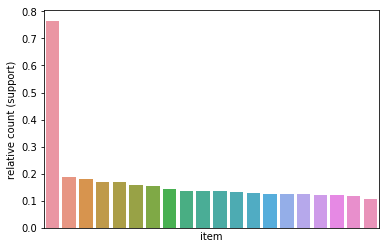

In [70]:
sns.barplot(x=relItemCount.index[:20], y=relItemCount.values[:20])
plt.xticks([])
plt.xlabel('item')
plt.ylabel('relative count (support)')

Above plot shows the support for 20 1-itemsets with highest values of support (relative count). The item with support of 0.76 is Postage. Except that most of the items have support below 0.2. So the support threshold that we use for MBA should be way below 0.2. In this use case I choose 0.7.

Note that one item ('Postage') has an extremely large support (0.76) compared to the rest of the items. This item is almost always in the basket irrespective of which item is being bought. The presence of this item in the dataset will contaminate the association rules and hence will be dropped.

In [97]:
transactions.drop('POSTAGE', inplace=True, axis=1)

In [98]:
frequentItemsets = apriori(transactions, min_support=0.07, use_colnames=True)
print("No. of frequent itemsets: ", frequentItemsets.shape[0])
frequentItemsets

No. of frequent itemsets:  51


,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


#### We can use either confidence or lift as the metric to create association rules

In [102]:
rules = association_rules(frequentItemsets, metric="lift", min_threshold=1.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


It is usual for a larger set of rules to be generated initiallly. We can then screen these rules to obtain the most relavant rules by varying the thresholds of confidence, lift, leverage or conviction.

In [103]:
rules.loc[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8), :]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
